<center> 
    <h1> Long Assignment 2021/2022 </h1>
    <h2> Introduction to Data Science </h2>
</center>
<br>

<h4 align=right> <b>Piotr Buczek</b> </h4>
<h4 align=right> <b>Agata Dratwa</b> </h4>
<h4 align=right> <b>Katarzyna Szleper</b> </h4>

<br>


## **1. Business understanding**
<br>
Background:

- Company works in luxury market.

Business objective: 

- Company wants to determine which attributes of website/product influence the customers' decision to buy particular products in order to increase its online sales.

Business succes criteria: 

- Signifcant increase in amount of sales in the e-commerce. 
- Spotted factors which mainly contribute to customers' purchasing decisions. 

Data: 

- Access to data of each customer separately during the session (type of device, movement in the website, duration, origin etc.)

Data Mining Goals:

- Predict if customer will buy the product given different attributes

Data Mining Success Criteria:

- Not explicit. We can assume that we want to achive a certain level of predective accuracy (e.g over 80%).

## **2. Data Understanding**
<br>

In this point, raw data was presented in different ways. At the beginning we can take a look at the first rows of data in a table form.

In [1]:
import pandas as pd
import numpy as np 
    
dataset_train_full = pd.read_csv('train_full.csv')
dataset_train_balanced = pd.read_csv('train_balanced.csv')
dataset_train_full.head()

,Unnamed: 0,session_id,plaform,segment,customer_type,device_group,visitor_type,has_listing,has_used_search,has_recommendation,...,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,is_subscribed,browser_name,country,bought
0,0,aae4be18-e8f9-41c6-8906-6fa41cd83f8a,website,without_segment,prospect,Mobile Web,new,1,0,0,...,0,0,1,0,0,1,NaN,Safari,US,0
1,1,62175cec-8acd-420c-ba11-0082901d6333,website,without_segment,prospect,Mobile Web,returning,0,0,1,...,0,0,1,1,1,1,NaN,Chrome,MX,0
2,2,e45c3886-bfeb-45c5-8d3f-00011d89a767,mobile_app,FFACCESS-Bronze,customer,App,returning,1,0,1,...,0,27,10,1,1,1,No,NaN,RU,0
3,3,9fd5e56c-24e9-4974-9d69-e3509922d80d,mobile_app,without_segment,customer,App,returning,1,0,0,...,0,88,15,5,1,1,Yes,NaN,RU,0
4,4,ddebea0b-a83f-459f-b0c4-d17efe4df69f,website,without_segment,prospect,Mobile Web,new,0,0,0,...,0,0,1,1,1,1,NaN,Instagram App,US,0


In order to get some more information about the number of not NaN values and type of variable, we used the info() function. We can observe meaningful loss in data in columns is_subscribed and browser_name.

In [2]:
dataset_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  95000 non-null  int64 
 1   session_id                  95000 non-null  object
 2   plaform                     95000 non-null  object
 3   segment                     95000 non-null  object
 4   customer_type               95000 non-null  object
 5   device_group                95000 non-null  object
 6   visitor_type                95000 non-null  object
 7   has_listing                 95000 non-null  int64 
 8   has_used_search             95000 non-null  int64 
 9   has_recommendation          95000 non-null  int64 
 10  has_add_to_wishlist         95000 non-null  int64 
 11  has_add_to_bag              95000 non-null  int64 
 12  duration                    95000 non-null  int64 
 13  view_qty                    95000 non-null  in

<br>

#### Data dictionary with description of the variables according to their type:
<br>

• session_id -> Identifier of the session -> **nominal variable**

• plaform -> Identifies used platform (website/mobile app) -> **nominal binary variable**

• segment -> Variable not described (without_segment/FFACCESS-Bronze/FACCESS-Gold/FACCESS-Platinum/FACCESS-Silver/FACCESS-Private-Client) -> **categorical nominal variable**

• customer type -> Identifies if a user has purchased before (customer/prospect) -> **nominal binary variable**

• device group -> Device Group (app/mobile web/desktop) -> **categorical nominal variable**

• visitor type -> If the device is new in the company platform (new/returning) -> **nominal binary variable**

• has_listing -> Flag that indicates if the session has a listing view -> **binary variable**

• has_used_search -> Flag that indicates if the session has a search view -> **binary variable**

• has_recommendation -> Flag that indicates if the session has a recommendation view -> **binary variable**

• has_add_to_wishlist -> Flag that indicates if the session has an add_to_wishlist view -> **binary variable**

• has_add_to_bag -> Flag that indicates if the session has an add_to_bag view -> **binary variable**

• duration -> Session duration (in seconds) -> **continuous numeric**

• view_qty -> Number of views in the session -> **discrete numeric**

• unique_product_qty -> Number of distinct product page views within the session -> **discrete numeric**

• unique_browse_designer_qty -> Number of distinct designer_id within the session -> **discrete numeric**

• unique_browse_category_qty -> Number of distinct category_id within the session -> **discrete numeric**

• is_subscribed -> If the user is subscribed in the newsletter -> **nominal binary variable**

• browser_name -> User agent browser name -> **nominal variable**

• country -> Session client country -> **nominal variable**

• bought -> Flag that indicates if the session has an order -> **binary variable**

In [3]:
dataset_train_processed = dataset_train_full.copy()

#Removal of is_subscribed and browser_name
dataset_train_processed = dataset_train_processed.drop(columns=['is_subscribed', 'browser_name'])
                             
dataset_train_balanced.head()

,Unnamed: 0,session_id,plaform,segment,customer_type,device_group,visitor_type,has_listing,has_used_search,has_recommendation,...,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,is_subscribed,browser_name,country,bought
0,90000,a392f31b-fbe2-474a-be21-b0993ce39050,website,without_segment,prospect,Mobile Web,new,1,1,1,...,1,2766,58,21,8,5,NaN,Apple Mail,US,1
1,90001,40ff2080-12c9-41c8-b730-de882cc863cf,website,FFACCESS-Silver,customer,Mobile Web,returning,1,1,1,...,1,928,19,4,6,2,Yes,Samsung Browser,KR,1
2,90002,d7a372e9-6d4f-4063-9537-51d5e8913f6a,mobile_app,FFACCESS-Private-Client,customer,App,returning,1,1,0,...,1,848,70,6,2,1,Yes,NaN,CN,1
3,90003,88fc6385-98b8-4e46-95f4-22a5ffa428f7,mobile_app,without_segment,customer,App,returning,0,0,0,...,1,243,25,1,1,1,No,NaN,HK,1
4,90004,68998626-90d5-421a-a6e6-0ec8b3f2fd45,mobile_app,without_segment,customer,App,returning,1,0,0,...,1,1806,135,25,14,4,No,NaN,RU,1


<br>

#### Preliminary analysis
According to the data types we can distinguish 3 main groups of attributes:

- binary variables (platform, customer_type, visitor_type, has_listing, has_used_search, has_recommendation, has_add_to_wishlist, has_add_to_bag, bought)
- numerical variables (duration, view_qty, unique_product_qty, unique_browse_designer_qty, unique_browse_category_qty)
- categorical variables (segment, device_group)
- nominal variables (session_id, country) 

Data analysis might be performed only on the numerical, binary and categorical variables.

In [4]:
attributes = ['plaform', 'segment', 'customer_type', 'device_group', 'visitor_type', 'has_listing', 'has_used_search', 'has_recommendation', 'has_add_to_wishlist', 'has_add_to_bag', 'duration', 'view_qty', 'unique_product_qty', 'unique_browse_designer_qty', 'unique_browse_category_qty', 'browser_name', 'country', 'bought']
endogenous= ['plaform', 'customer_type', 'visitor_type', 'has_listing', 'has_used_search', 'has_recommendation', 'has_add_to_wishlist', 'has_add_to_bag', 'duration', 'view_qty', 'unique_product_qty', 'unique_browse_designer_qty', 'unique_browse_category_qty']
binary = ['plaform', 'customer_type', 'visitor_type', 'has_listing', 'has_used_search', 'has_recommendation', 'has_add_to_wishlist', 'has_add_to_bag', 'bought']
numerical = ['duration','view_qty','unique_product_qty', 'unique_browse_designer_qty', 'unique_browse_category_qty']
categorical = ['segment', 'device_group']
binnumcat = ['plaform', 'customer_type', 'visitor_type', 'has_listing', 'has_used_search', 'has_recommendation', 'has_add_to_wishlist', 'has_add_to_bag', 'bought','duration','view_qty','unique_product_qty', 'unique_browse_designer_qty', 'unique_browse_category_qty','segment', 'device_group']

Summaries and spread measures for numerical variables

In [5]:
dataset_train_processed[numerical].describe()

,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty
count,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000
mean,332.473663,10.972179,2.766547,1.676105,1.166042
std,868.827560,31.213357,8.493634,3.374039,1.353135
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000
50%,15.000000,2.000000,1.000000,1.000000,1.000000
75%,223.000000,8.000000,2.000000,1.000000,1.000000
max,20295.000000,1151.000000,416.000000,158.000000,84.000000


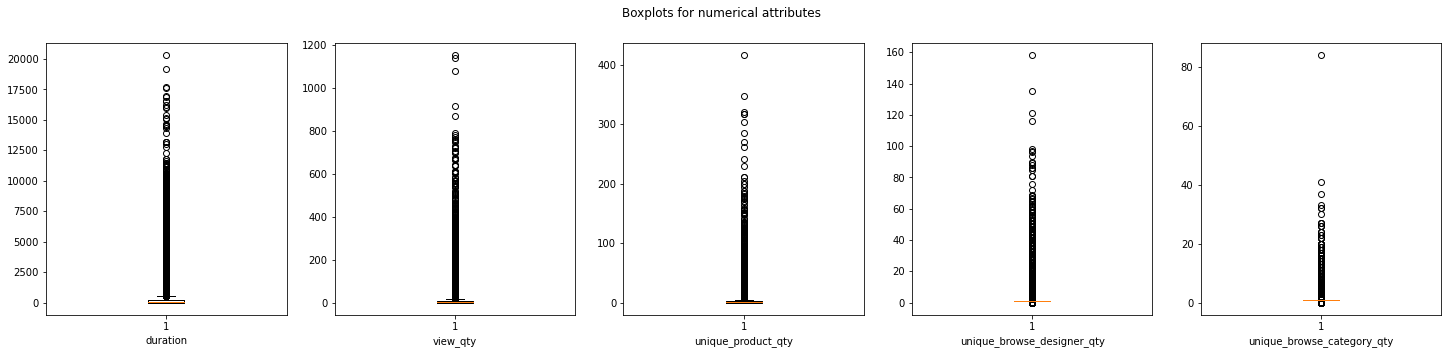

In [9]:
import matplotlib.pyplot as plt

#Boxplots
fig, sc = plt.subplots(1,len(numerical), figsize=(25,5))
fig.suptitle('Boxplots for numerical attributes')
for i in range(len(numerical)):
    sc[i].boxplot(dataset_train_processed[numerical[i]])
    sc[i].set(xlabel=numerical[i])

As we can see on the boxplots of each numerical attribute there exist many outliers

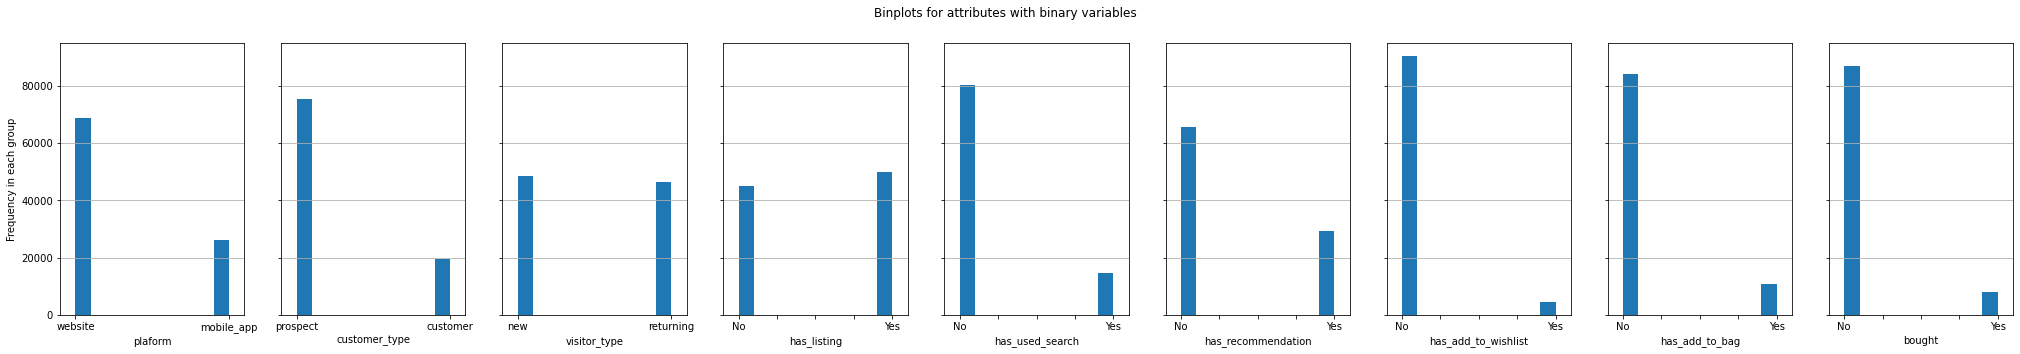

In [10]:
def bintransformation(v, t):
    if v == 0:
        return 'No'
    if v == 1:
        return 'Yes'
#Binplots for binary
fig, sc = plt.subplots(1,len(binary), figsize=(35,5))
fig.suptitle('Binplots for attributes with binary variables')
for i in range(len(binary)):
    sc[i].hist(dataset_train_processed[binary[i]], align='mid')
    sc[i].set(xlabel=binary[i])
    sc[i].set_ylim(0,95000)
    sc[i].set_xlim(-0.1, 1.1)
    sc[i].grid(axis='y')
    if i > 0:
        sc[i].yaxis.set_major_formatter(plt.NullFormatter())
    if i > 2:
        sc[i].xaxis.set_major_formatter(plt.FuncFormatter(bintransformation))

        
sc[0].set(ylabel='Frequency in each group');

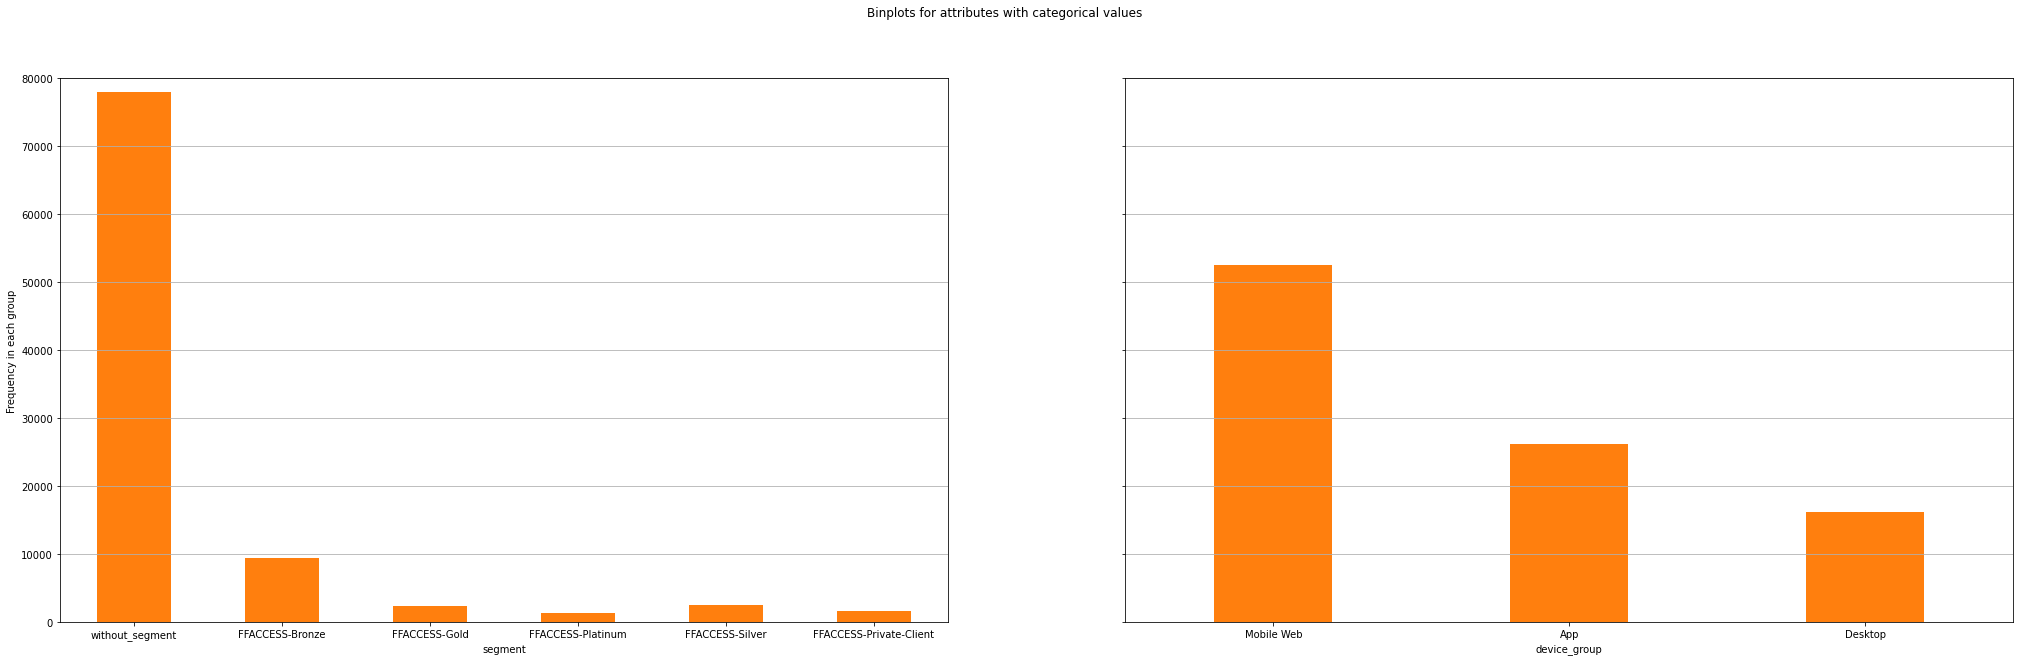

In [7]:
#Binplots for categorical
fig, sc = plt.subplots(1,len(categorical), figsize=(35,10))
fig.suptitle('Binplots for attributes with categorical values')
for i in range(len(categorical)):
    sc[0].hist(dataset_train_processed[categorical[0]], align='left', bins = range(7), rwidth=0.5)
    sc[0].set_xlim(-0.5, 5.5)
    sc[1].hist(dataset_train_processed[categorical[1]], align='left', bins = range(4), rwidth=0.4)
    sc[1].set_xlim(-0.5, 2.5)
    sc[i].set(xlabel=categorical[i])
    sc[i].set_ylim(0, 80000)
    sc[i].grid(axis='y')
    sc[1].yaxis.set_major_formatter(plt.NullFormatter())
sc[0].set(ylabel='Frequency in each group');

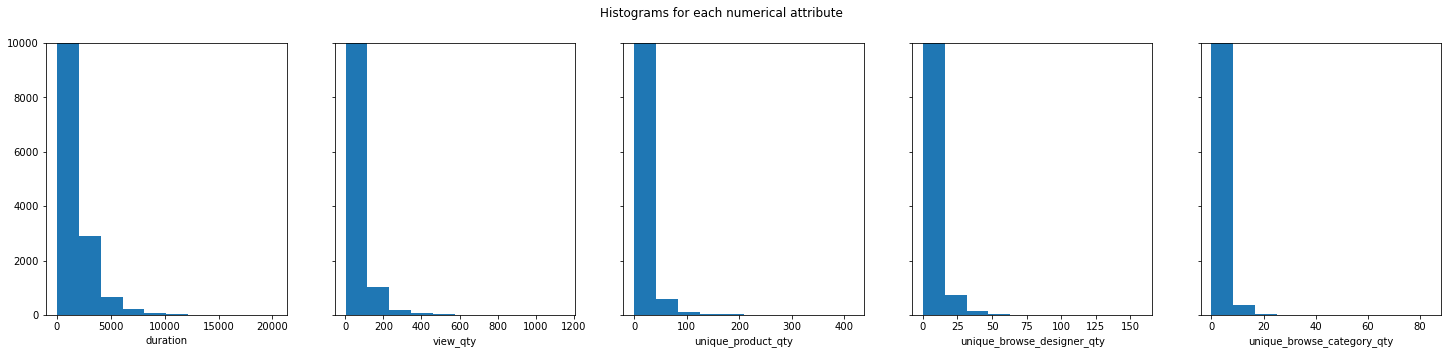

In [8]:
fig, sc = plt.subplots(1,len(numerical), figsize=(25,5))
fig.suptitle('Histograms for each numerical attribute')
for i in range(len(numerical)):
    sc[i].hist(dataset_train_processed[numerical[i]])
    sc[i].set(xlabel=numerical[i])
    sc[i].set_ylim(0, 10000)
    if i > 0:
        sc[i].yaxis.set_major_formatter(plt.NullFormatter())

In order to present better the distribution of numerical attributes we plot them in log scale.

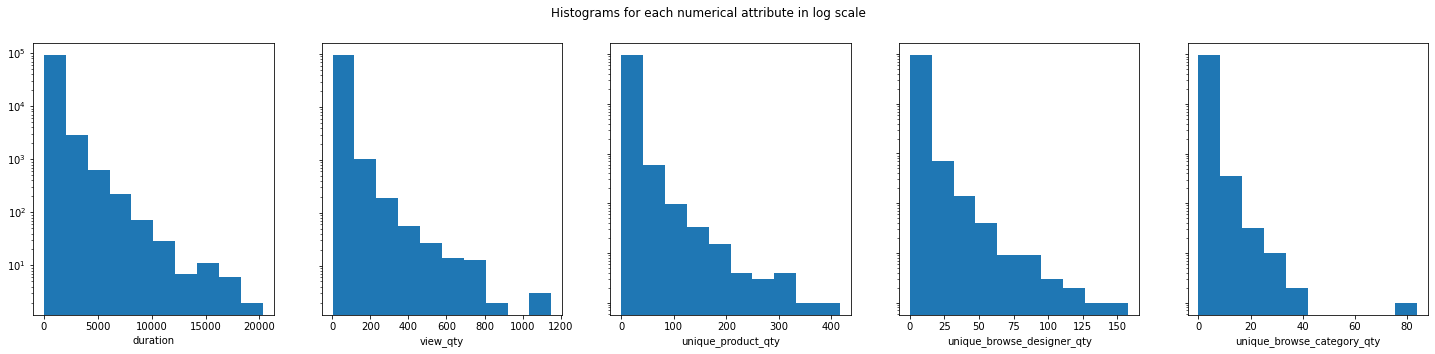

In [9]:
fig, sc = plt.subplots(1,len(numerical), figsize=(25,5))
fig.suptitle('Histograms for each numerical attribute in log scale')
for i in range(len(numerical)):
    sc[i].hist(dataset_train_processed[numerical[i]], log=True)
    sc[i].set(xlabel=numerical[i])
    if i > 0:
        sc[i].yaxis.set_major_formatter(plt.NullFormatter())

<br>

#### Bivariate analysis

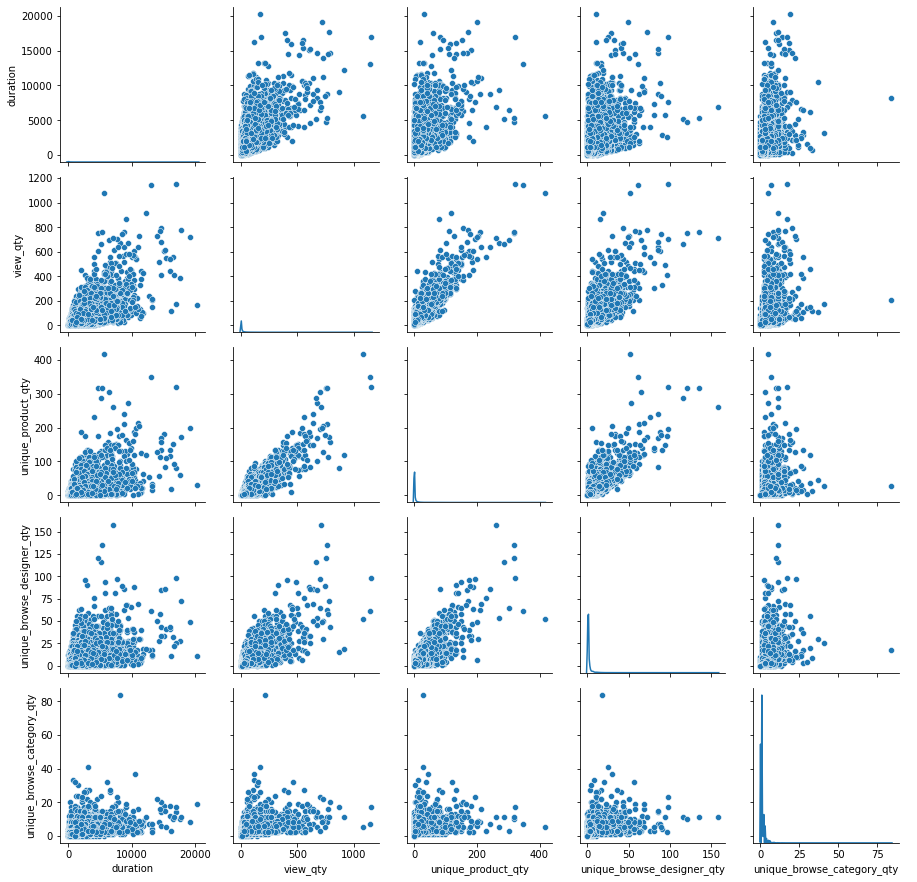

In [10]:
import seaborn as sns
#only for numerical variables
d = sns.PairGrid(dataset_train_processed[numerical]) 
d.map_diag(sns.kdeplot)
d.map_offdiag(sns.scatterplot)
d.add_legend();

In order to process nominal binary variables, nominal values were transformed into binary (0,1) values.

In [11]:
#Nominal binary variables transformation
dataset_train_processed['plaform'] = dataset_train_processed['plaform'].replace(['website', 'mobile_app'], [0, 1])
dataset_train_processed['customer_type'] = dataset_train_processed['customer_type'].replace(['prospect', 'customer'], [0, 1])
dataset_train_processed['visitor_type'] = dataset_train_processed['visitor_type'].replace(['new', 'returning'], [0, 1])

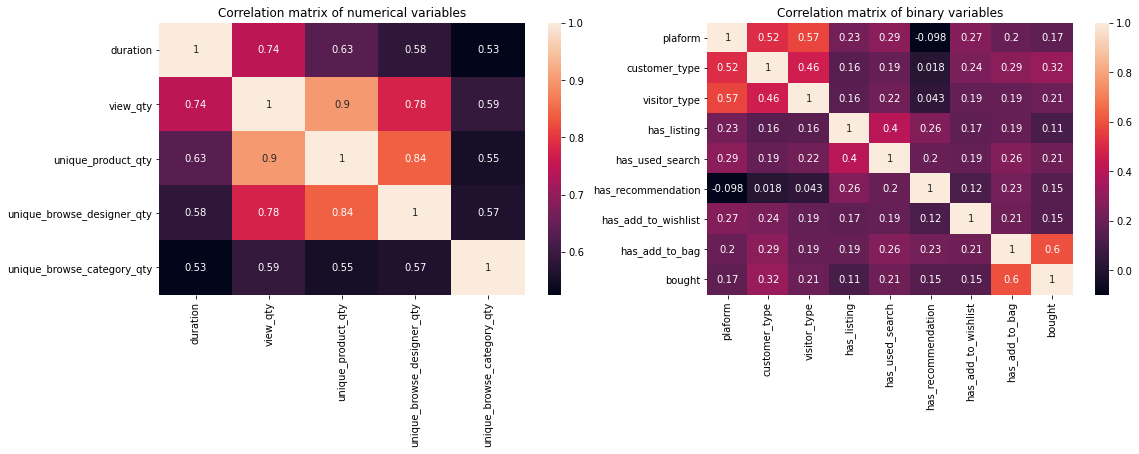

In [12]:
#Heatmap for numerical
corr = dataset_train_processed[numerical].corr()
fig, ax = plt.subplots(1,2, figsize=(18,5)) 
sns.heatmap(corr, annot=True, ax=ax[0])
ax[0].set_title('Correlation matrix of numerical variables')

#Heatmap for binary
corr = dataset_train_processed[binary].corr()
sns.heatmap(corr, annot=True, ax=ax[1])
ax[1].set_title('Correlation matrix of binary variables');

All numerical variables are highly correlated with each other which can cause future problems with redundancies during modeling. Due to that we should be cautious with selecting them all together in one model.
As we can see in the second heatmap, majority of binary variables aren't correlated significantly with each other (except customer_type with platform ans visitor_type with platfrom) which is good for including them all together in modelling.
Also our exogenous variable isn't highly correlated with binary variables (except of has_add_to_bag variable) what means they are
not the best potentially data for modelling. However, we will take ones with highest correlation among them to try if they can be useful for modelling.

<br>

#### Biserial correlation for correlation between numerical and binary variables
Due to binary type and numerical type of data we had to change the pearson correlation to biserial correlation.

In [13]:
from scipy.stats import pointbiserialr
y = dataset_train_processed.bought
regression_scores = pd.DataFrame()
corr = []
correlation_scores = pd.DataFrame()
for i in range(len(numerical)):
    X = dataset_train_processed[numerical[i]]
    pbc = pointbiserialr(y, X)
    corr.append(pbc[0])
correlation_scores['Variable']=numerical
correlation_scores['Biserial correlation']=corr
correlation_scores

,Variable,Biserial correlation
0,duration,0.443926
1,view_qty,0.362025
2,unique_product_qty,0.201568
3,unique_browse_designer_qty,0.179785
4,unique_browse_category_qty,0.203616


From all of numerical variables duration and number of views in the session have the strongest correlation with bought variable but still the correlation is rather weak.  In all of other cases the correlation is so low that we can assume that there is no correlation between variables. Probably the first two variables will be the best data for futer modelling.

<br>

#### Logistic regression

In [14]:
#Logistic regression - each attribute with bought

from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression(solver='liblinear', random_state=0)
y = dataset_train_processed.bought
scores = []
coeffs = []

for i in range(len(endogenous)):
    X = np.array(dataset_train_processed[endogenous[i]]).reshape((-1,1))
    model.fit(X, y)
    scores.append(model.score(X,y))
    coeffs.append(model.coef_[0][0])
    
regression_scores = pd.DataFrame({'Variable': endogenous, 'R2':scores, 'Coefficient':coeffs})
regression_scores

,Variable,R2,Coefficient
0,plaform,0.915789,1.218800
1,customer_type,0.915789,2.152338
2,visitor_type,0.915789,1.730145
3,has_listing,0.915789,0.884979
4,has_used_search,0.915789,1.497733
5,has_recommendation,0.915789,1.054551
6,has_add_to_wishlist,0.915789,1.519731
7,has_add_to_bag,0.927147,3.882701
8,duration,0.920326,0.001161
9,view_qty,0.916768,0.029956


We can observe that all of the R2 has high significant level of describing 'bought' variable. To compare the size of relationship between the variables we can use the coefficient values. All of the variables have positive values of the coefficient, which means positive influence on the bought. The highest influence on the "bought" based on coefficient has:
- if the person added an item to the bag (has_add_to_bag) 
- if a user has purchased before (customer_type)
- if the device is new in the company platform (new/returning)(visitor_type)
- flag that indicates if the session has an add_to_wishlist view(has_add_to_wishlist)
- if the session has a search view (has_used_search)


<br>

#### Conclusions and insights about the data
- High standard deviation among numerical variables, big difference between mean and median values. This is caused by high rate of outliers in the database. All outliers existing in the dataset might not be errors. This values could be caused by normal using of the page by users, ex. user can left the page open which makes the duration time high.
- Attribute is_subscribed has a lot of NaN values (over 70%) and browser_name also has few non-null values (around 30%).
- None of the numerical variables has normal distribution. All of them has right-skewed distribution.
- From bivariate analysis we can conclude that there is high correlation between the numerical endogenous variables which can cause redundancies(unwanted phenomenon). Despite not signicant correlations between endogenous and exogenous variables we can select some potentials features in order to include them in future modelling. In order to choose variables with the highest impact on our bought variable we conducted also logistic regression. The variables with the biggest impact on "bought" variable have the highest value of coefficient in logistic regression, which are all binary variables. To sum up our bivariate analysis, the biggest impact on our dependent variables have: has_add_to_bag, customer_type, visitor_type, has_add_to_wishlist, has_used_search. This features will be further analysed.

## **3. Data Preparation**

#### List of main changes:
- Due to right-skewed distribution we can perform log transformation in order to normalize.
- Outliers influence the spread measures. In order to preprocess the data, in attributes which are containing errors - we can remove or replace the outliers with median due to the fact that the data is not time series.
- Attributes containing a lot of NaN values should be probably removed. Insertion of values instead of NaN is not reasonable in this case because there is too much of them.
- After the bivariate analysis we could remove some of the attributes with the lowest impact on our bought variable because they probably won't be useful in future modeling.

## **4. Modeling**

### **4.1. Balanced data** - sample of 16000 observations with the same variables as the non-balanced (raw) data

First we will do few operations on our balanced dataset to make our modeling easier. <br/>
We will delete 4 variables- unamed column which indexes rows, "browser_name" and "is_subscribed" because it has too many NA values, and session_id because it is unique key of each row so we won't use it in modeling. <br/>
Also as with raw data we will convert our binary variables to 0 and 1, because we will need this in most models.

In [15]:
from sklearn.model_selection import train_test_split

dataset_train_balanced = pd.read_csv('train_balanced.csv')

#Split the data into test and train sets
dataset_train_balanced = dataset_train_balanced.drop(['Unnamed: 0','browser_name', 'is_subscribed', 'session_id'], axis=1)
dataset_train_balanced['plaform'] = dataset_train_balanced['plaform'].replace(['website', 'mobile_app'], [0, 1])
dataset_train_balanced['customer_type'] = dataset_train_balanced['customer_type'].replace(['prospect', 'customer'], [0, 1])
dataset_train_balanced['visitor_type'] = dataset_train_balanced['visitor_type'].replace(['new', 'returning'], [0, 1])

#Split the data into test and train sets
X = dataset_train_balanced.drop('bought',axis=1)
y = dataset_train_balanced.bought

X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X, y, train_size=0.9, 
                                  random_state=123) 

### **4.1.1. Nearest neighbour**

Scaling numerical variables is required to use the kNN method, because it uses the Euclidean distance between two data points to find nearest neighbors.

In [17]:
#Creating dataframe to compare the results
models = ['kNN', 'Bayesian Classifier', 'Decision Trees', 'Tree Ensembles', 'Support Vector Machines', 'Neural Networks']
scores = pd.DataFrame(index = models, columns = ['Accuracy Rate', 'Standard deviation'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset_train_balanced[numerical])
scaled_features = scaler.transform(dataset_train_balanced[numerical])

df_feat = pd.DataFrame(scaled_features,columns=dataset_train_balanced[numerical].columns)
df_feat.head()

,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty
0,1.230939,0.540053,1.153544,1.020254,1.793482
1,0.009787,-0.163858,-0.102135,0.642679,0.218093
2,-0.043365,0.756641,0.045592,-0.112470,-0.307037
3,-0.445322,-0.055564,-0.323725,-0.301257,-0.307037
4,0.593123,1.929826,1.448998,2.152978,1.268352


<br/>To find the number of neighbours which provides the best accuracy, we are fitting our model with different K-value from 1 to 30.<br/>
The result is shown on a plot of the accuracy rate vs K-value. 

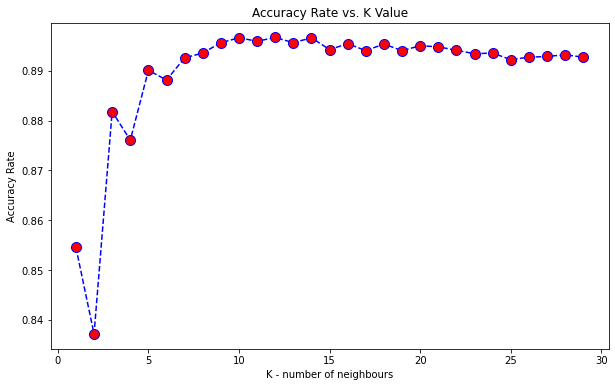

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix

# splitting dataset
X1 = df_feat # scaled endogenous variables
y = dataset_train_balanced.bought

X_balanced_train1, X_balanced_test1, y_balanced_train1, y_balanced_test1 = train_test_split(X1, y, train_size=0.9, 
                                  random_state=123) 

accuracy_rate = []
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_balanced_train1,y_balanced_train1)
    accuracy_rate.append(cross_val_score(model, X_balanced_train1,y_balanced_train1, cv=10).mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K - number of neighbours')
plt.ylabel('Accuracy Rate');

On the plot above we can see that one of the best accuracy rate is for **k = 12**. <br/>
Now we will retrain our model using k = 12.

In [19]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_balanced_train1, y_balanced_train1)

#Cross-validation
score = cross_val_score(model, X_balanced_train1, y_balanced_train1, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))
scores['Accuracy Rate']['kNN'] = score.mean()
scores['Standard deviation']['kNN'] = score.std()

0.897 accuracy with a standard deviation of 0.009


Our accuracy score with **k-value = 12 is 90% (0.009)**

This value is about 5% better than when k-value = 2 (the lowest accuracy score). 
Almost 90% of values were predicted correctly which is high result. 

We will use model with k = 12 to compare KNN with different kinds of models.

#### **4.1.2. Bayesian Classifier**

In [20]:
X['country'].describe()

count     16000
unique      125
top          US
freq       3237
Name: country, dtype: object

<br/>Variable country has as many as 125 unique variables so we won't use it in our model because it will be hard to convert it.<br/>
In addition from our analysis at the beginning we know that it hasn't got high impact on our y.

As we know from the preliminary analysis, our X has both categorical and numerical variables so we have to conduct **mixed naive bayes model**. <br/>

In [21]:
from mixed_naive_bayes import MixedNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Select and encode categorical features

selected_categorical_features=[0,1,2,3,4,5,6,7,8,9]

X2 = X.drop('country', axis=1)

enc = OrdinalEncoder()
enc.fit(X2.iloc[:,selected_categorical_features])
X2.iloc[:,selected_categorical_features]=enc.transform(X2.iloc[:,selected_categorical_features])

# Encode the target variable

lenc=LabelEncoder()
lenc.fit(y)
y=lenc.transform(y)

X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X2, y, train_size=0.9, 
                                  random_state=123)

model = MixedNB(categorical_features=selected_categorical_features)
model.fit(X_balanced_train, y_balanced_train)

# evaluate the model on train and test
score = cross_val_score(model,X_balanced_train,y_balanced_train)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores['Accuracy Rate']['Bayesian Classifier'] = score.mean()
scores['Standard deviation']['Bayesian Classifier'] = score.std()

0.772 accuracy with a standard deviation of 0.009


Mixed Naive Bayes Classifier obtained **77.2% (0.009)** accuracy which is much lower than in case of KNN. That means that with this dataset KNN approach is more efficient.

#### **4.1.3. Decision Trees**

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   plaform                     16000 non-null  int64 
 1   segment                     16000 non-null  object
 2   customer_type               16000 non-null  int64 
 3   device_group                16000 non-null  object
 4   visitor_type                16000 non-null  int64 
 5   has_listing                 16000 non-null  int64 
 6   has_used_search             16000 non-null  int64 
 7   has_recommendation          16000 non-null  int64 
 8   has_add_to_wishlist         16000 non-null  int64 
 9   has_add_to_bag              16000 non-null  int64 
 10  duration                    16000 non-null  int64 
 11  view_qty                    16000 non-null  int64 
 12  unique_product_qty          16000 non-null  int64 
 13  unique_browse_designer_qty  16000 non-null  in

<br/>Country variable has 125 unique values so it is too much to use it in decision trees because it will be hard to convert it to proper variables in decision tree model.

As we see above 2 of variables are type object- that means that before creating a model we have to convert them to dummy variables. We can see below how the transformation looks like for the segment categorical variable.

In [22]:
#Nominal binary variables transformation
X2 = X.drop('country', axis=1)
cat_feats = ['segment', 'device_group']
X2 = pd.get_dummies(X2,columns=cat_feats)
X2[['segment_FFACCESS-Bronze','segment_FFACCESS-Gold','segment_FFACCESS-Platinum', 'segment_FFACCESS-Private-Client', 'segment_FFACCESS-Silver']].head()

,segment_FFACCESS-Bronze,segment_FFACCESS-Gold,segment_FFACCESS-Platinum,segment_FFACCESS-Private-Client,segment_FFACCESS-Silver
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,0,0


Now all of variables are numerical so we can create a model. <br/>
We have changed our variables so we have to split our dataset again.

In [23]:
#Split the data into test and train sets
X_balanced_train2, X_balanced_test2, y_balanced_train2, y_balanced_test2 = train_test_split(X2, y, train_size=0.9, 
                                  random_state=123) 

In order to find the best depth parameter we are fitting our model with different depth parameter from 1 to 40.<br/> The result is shown on a plot of the accuracy rate vs. depth below.

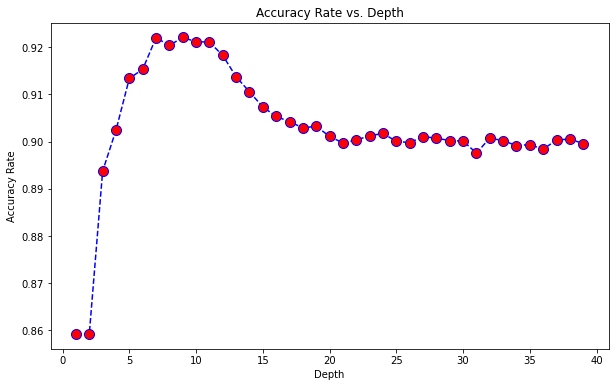

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def depth2acc(X1,y1,max_depth=None):
    dtree=DecisionTreeClassifier(max_depth=max_depth)
    scores=cross_val_score(dtree, X1, y1, cv=10)
    return scores.mean()

# build a list from 1 to 40 with step 1
depths=range(1,40,1)
accs=list(map(lambda i:depth2acc(X_balanced_train2,y_balanced_train2,i),depths))

from matplotlib.pyplot import plot
plt.figure(figsize=(10,6))
plt.plot(depths,accs,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy Rate');

It can be seen that the best accuracy is for the tree with depth = 9. <br/>
Instead of using the default value, we will retrain our model using depth = 9 to prevent from overfitting and prune the tree.

In [28]:
model = DecisionTreeClassifier(max_depth=9)
model.fit(X_balanced_train2,y_balanced_train2)
score = cross_val_score(model, X_balanced_train2, y_balanced_train2, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores['Accuracy Rate']['Decision Trees'] = score.mean()
scores['Standard deviation']['Decision Trees'] = score.std()

0.922 accuracy with a standard deviation of 0.007


The accuracy is **92.2% (0.007) for depth = 10**, which is about 6% higher than for depth = 2 (the lowest score). <br/>
We will use model with depth = 10 to compare Decision Trees model with different kinds of models. <br/>
We could plot our model but it won't be readable with such high depth.

#### **4.1.4. Tree ensembles**

Let's compare the decision tree model to a random forest.

In order to find the best number of trees in an random forest, we are fitting our model with number of estimators equal to: 1, 5, 10, 50, 100, 500, 1000.<br/>
The result is shown on a plot of the accuracy rate vs. number of trees below.

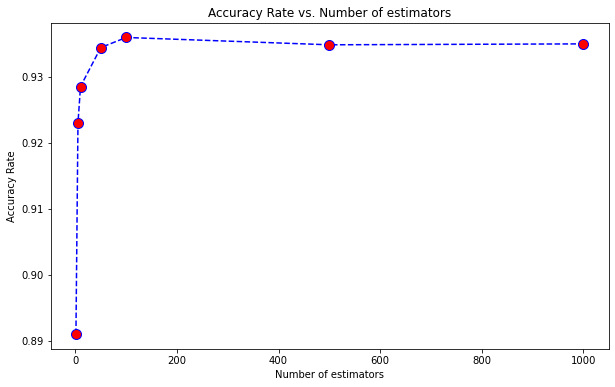

In [30]:
from sklearn.ensemble import RandomForestClassifier
n = (1, 5, 10, 50, 100, 500, 1000)
accuracy_rate = []
for i in n:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_balanced_train2,y_balanced_train2)
    accuracy_rate.append(cross_val_score(rfc, X_balanced_train2, y_balanced_train2, cv=10).mean())

plt.figure(figsize=(10,6))
plt.plot(n,accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. Number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy Rate');

Usually the higher the number of estimators the better accuracy of the model (by the cost of slower learning). It can be seen that the best accuracy is for the Random forest with 100 estimators and there is no significant increase for higher number of trees. We are building a new model with number of estimators = 100 to reduce the cost of learning.

In [42]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_balanced_train2,y_balanced_train2)
score = cross_val_score(model, X_balanced_train2, y_balanced_train2, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores['Accuracy Rate']['Tree Ensembles'] = score.mean()
scores['Standard deviation']['Tree Ensembles'] = score.std()

0.935 accuracy with a standard deviation of 0.008


The accuracy obtained for random forest model with **number of trees = 100 is equal to 93.5% (0.007)**, which is better score in comparison to single decision tree.

#### **4.1.5. Support Vector Machines**

In this model we are using the same data as in Decision Tree model - numerical variables and categorical variables transformed into dummy variables.

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_sample, X_rest, y_sample, y_rest = train_test_split(X_balanced_train2, y_balanced_train2, train_size=0.1, 
                                  random_state=123) 
model = SVC(kernel='linear', C=1)
model.fit(X_sample.iloc[:100],y_sample[:100])

score=cross_val_score(model, X_sample.iloc[:100], y_sample[:100], cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores['Accuracy Rate']['Support Vector Machines'] = score.mean()
scores['Standard deviation']['Support Vector Machines'] = score.std()

0.950 accuracy with a standard deviation of 0.067


We tried to use this model on a 100 sample and the performance was good (**95%**) but such small sample is not representative for the whole dataset.
Results are not satisfying and time consuming, it was not possible to increase the samples to obtain any result.
SVM is not a good model in this particular example.

#### **4.1.6. Neural Network Classifier**

In neural network model, platform and device_group categorical variables have to be transformed to dummy variables and country variable will be skipped, so dataset used in Decision Tree model is used also in this model.

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

model = MLPClassifier(random_state=1, 
                    hidden_layer_sizes=(50,50,),
                    max_iter=1000,verbose=0,tol=0.001,
                   activation='logistic').fit(X_balanced_train2, y_balanced_train2)

model.fit(X_balanced_train2, y_balanced_train2)

score=cross_val_score(model, X_balanced_train2, y_balanced_train2, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores['Accuracy Rate']['Neural Networks'] = score.mean()
scores['Standard deviation']['Neural Networks'] = score.std()

0.938 accuracy with a standard deviation of 0.008


The accuracy obtained for neural network model with **2 hidden layers, 50 neurons each is equal to 93.8% (0.009)**. This model characterises high accuracy but is also time consuming.

### **Comparison**

In order to compare the data we summarized the obtained accuracy scores and present in a table below.

In [44]:
scores

,Accuracy Rate,Standard deviation
kNN,0.896875,0.009396
Bayesian Classifier,0.772292,0.009237
Decision Trees,0.922083,0.004023
Tree Ensembles,0.934722,0.008494
Support Vector Machines,0.95,0.067082
Neural Networks,0.937847,0.008922


We will use separated test sets to evaluate our 3 best models, which are:
- Neural Networks
- Trees Ensembles
- Decision Trees

In [11]:
#Evaluation

From the evaluation we can conlcude, that ... model is the best for the balanced data.

### **4.2. Non-balanced data**

This dataset was processed before so now we will only delete columns, because we won't need them in modeling.

In [33]:
dataset_train_processed = dataset_train_processed.drop(['session_id','Unnamed: 0'], axis=1)

We split our data on train and test set.

In [34]:
X = dataset_train_processed.drop('bought',axis=1)
y = dataset_train_processed.bought

X_processed_train, X_processed_test, y_processed_train, y_processed_test = train_test_split(X, y, train_size=0.9, 
                                  random_state=123) 

#### **4.2.1. Nearest neighbour**

We are doing the same steps as with balanced data.

First scaling the data, because it uses the Euclidean distance between two data points to find nearest neighbors.

In [57]:
#Creating dataframe to compare the results
scores2 = pd.DataFrame(index = models, columns = ['Accuracy Rate', 'Standard deviation'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset_train_processed[numerical])
scaled_features = scaler.transform(dataset_train_processed[numerical])

df_feat = pd.DataFrame(scaled_features,columns=dataset_train_processed[numerical].columns)
df_feat.head()

,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty
0,-0.382671,-0.319486,-0.325722,-0.496768,-0.12271
1,-0.382671,-0.319486,-0.207986,-0.200386,-0.12271
2,-0.351595,-0.031146,-0.207986,-0.200386,-0.12271
3,-0.281385,0.129042,0.262957,-0.200386,-0.12271
4,-0.382671,-0.319486,-0.207986,-0.200386,-0.12271


<br/>Then in order to find the number of neighbours which provides the best accuracy, we are fitting our model with different K-value from 1 to 30. The result is shown on a plot of the accuracy rate vs K-value. 

Text(0, 0.5, 'Accuracy Rate')

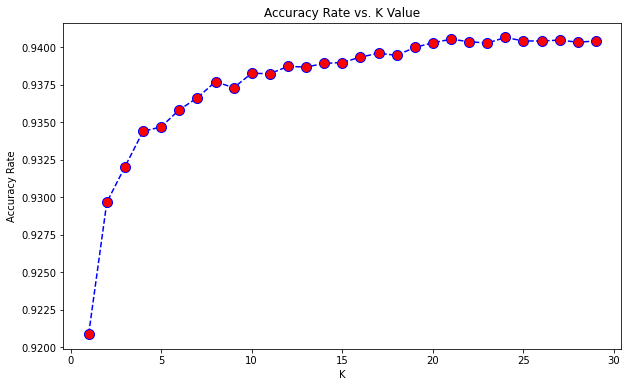

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix

# splitting dataset
X1 = df_feat # scaled endogenous variables
y = dataset_train_processed.bought

X_processed_train1, X_processed_test1, y_processed_train1, y_processed_test1 = train_test_split(X1, y, train_size=0.9, 
                                  random_state=123) 

accuracy_rate = []
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_processed_train1, y_processed_train1)
    accuracy_rate.append(cross_val_score(model, X_processed_train1, y_processed_train1, cv=10).mean())
    
# plot
plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

On the plot above we can see that one of the best accuracy rate is for **k = 21**. <br/>
This is high value of neigbours so we have to be careful if our model is not overfitted. <br/>
Now we will retrain our model using k = 12.

In [60]:
model = KNeighborsClassifier(n_neighbors=21)
model.fit(X_processed_train1, y_processed_train1)

#Cross-validation
score=cross_val_score(model, X_processed_train1, y_processed_train1, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))
scores2['Accuracy Rate']['kNN'] = score.mean()
scores2['Standard deviation']['kNN'] = score.std()

0.941 accuracy with a standard deviation of 0.002


<br/>Our accuracy score with **k-value = 12 is 94.1% (0.002)**

This value is about 2% better than when k-value = 1 (the lowest accuracy score). 
Almost 90% of values were predicted correctly which is high result. 

We will use model with k=21 to compare KNN with different kinds of models.


#### **4.2.2. Bayesian Classifier**

In [41]:
X['country'].describe()

count     94996
unique      162
top          US
freq      15772
Name: country, dtype: object

As with balanced data in this case we also have to remove country variable because it has 162 unique variables.

From the preliminary analysis, we know that X has both categorical and numerical variables so we have to conduct **mixed naive bayes model**. <br/>

In [62]:
# which features are categorical
selected_categorical_features=[0,1,2,3,4,5,6,7,8,9]

# encode the categorical features in X
enc = OrdinalEncoder()
enc.fit(X.iloc[:,selected_categorical_features])
X.iloc[:,selected_categorical_features]=enc.transform(X.iloc[:,selected_categorical_features])

# encode the target variable
lenc=LabelEncoder()
lenc.fit(y)
y=lenc.transform(y)

X_processed_train, X_processed_test, y_processed_train, y_processed_test = train_test_split(X.iloc[:,0:15], y, train_size=0.9, 
                                  random_state=123)

model = MixedNB(categorical_features=selected_categorical_features)

# fit the model with training data
model.fit(X_processed_train.iloc[:,0:15], y_processed_train)

# evaluate the model on train and test
score = cross_val_score(model,X_processed_train.iloc[:,0:15], y_processed_train)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores2['Accuracy Rate']['Bayesian Classifier'] = score.mean()
scores2['Standard deviation']['Bayesian Classifier'] = score.std()

0.908 accuracy with a standard deviation of 0.002


Mixed Naive Bayes Classifier obtained **90% (0.002)** which is much higher score than in case of balanced data where the score was 77.2%.

#### **4.2.3 Decision Trees**

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   plaform                     95000 non-null  float64
 1   segment                     95000 non-null  float64
 2   customer_type               95000 non-null  float64
 3   device_group                95000 non-null  float64
 4   visitor_type                95000 non-null  float64
 5   has_listing                 95000 non-null  float64
 6   has_used_search             95000 non-null  float64
 7   has_recommendation          95000 non-null  float64
 8   has_add_to_wishlist         95000 non-null  float64
 9   has_add_to_bag              95000 non-null  float64
 10  duration                    95000 non-null  int64  
 11  view_qty                    95000 non-null  int64  
 12  unique_product_qty          95000 non-null  int64  
 13  unique_browse_designer_qty  950

In [63]:
X = X.drop(columns='country')

KeyError: "['country'] not found in axis"

<br/>Similar as with Bayesian Clasifier we won't use country variable because it has too many unique values.

As we see above 2 of variables are type object- that means that before creating a model we have to convert them to dummy variables so sklearn will be able to understand them.

In [64]:
cat_feats = ['segment', 'device_group']
X2 = pd.get_dummies(X,columns=cat_feats)



Now all of variables are numerical so we can create a model.



In [65]:
#Split the data into test and train sets
X_processed_train2, X_processed_test2, y_processed_train2, y_processed_test2 = train_test_split(X2, y, train_size=0.9, 
                                  random_state=123) 

In order to find the best depth parameter we are fitting our model with different depth parameter from 1 to 40. The result is shown on a plot of the accuracy rate vs. depth below.

Text(0, 0.5, 'Accuracy Rate')

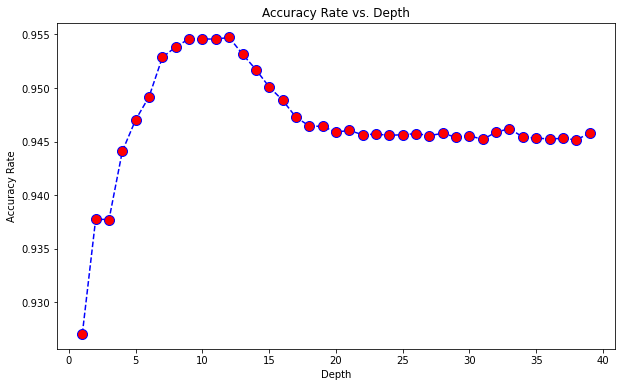

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def depth2acc(X1,y1,max_depth=None):
    dtree=DecisionTreeClassifier(max_depth=max_depth)
    dtree.fit(X1,y1)
    scores=cross_val_score(dtree, X1, y1, cv=10)
    return scores.mean()

depths=range(1,40,1)
accs=list(map(lambda i:depth2acc(X_processed_train2,y_processed_train2,i),depths))

plt.figure(figsize=(10,6))
plt.plot(depths,accs,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy Rate')

Instead of using the default value, we will retrain our model using depth = 11 (value with the best accuracy) to prevent from overfitting and prune the tree.

In [70]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_processed_train2,y_processed_train2)
score = cross_val_score(model, X_processed_train2, y_processed_train2, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std())
    
scores2['Accuracy Rate']['Decision Trees'] = score.mean()
scores2['Standard deviation']['Decision Trees'] = score.std())

SyntaxError: invalid syntax (<ipython-input-70-f693fe354360>, line 6)

The accuracy is **95.5% (0.002) for depth = 11**, which is about 3% higher than for depth = 1 (the lowest score). <br/>
We will use model with depth = 11 to compare Decision Trees model with different kinds of models. <br/>
We could plot our model but it won't be readable with such high depth.

#### **4.2.4. Tree ensembles**

As with balanced data in order to find the best number of trees in a random forest we are fitting our motel with different number of estimators

Text(0, 0.5, 'Accuracy Rate')

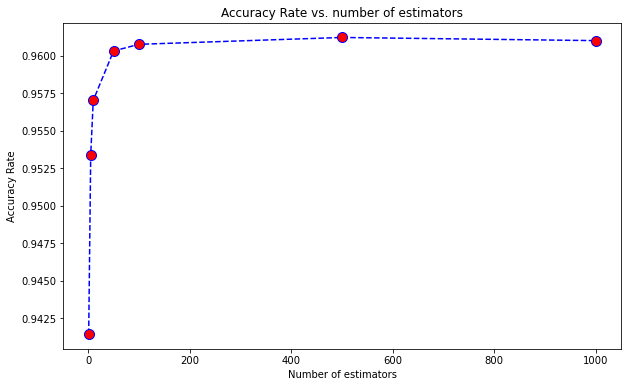

In [54]:
from sklearn.ensemble import RandomForestClassifier

n = (1, 5, 10, 50, 100, 500, 1000)
accuracy_rate = []
for i in n:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_processed_train2,y_processed_train2)
    accuracy_rate.append(cross_val_score(rfc, X_processed_train2,y_processed_train2, cv=10).mean())

plt.figure(figsize=(10,6))
plt.plot(n,accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy Rate')

Usually the higher the number of estimators the better accuracy of the model (by the cost of slower learning). It can be seen that the best accuracy is for the Random forest with 100 estimators and there is no significant increase for higher number of trees. We are building a new model with number of estimators = 100 to reduce the cost of learning.

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_processed_train2,y_processed_train2)
score = cross_val_score(rfc, X_processed_train2,y_processed_train2, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores2['Accuracy Rate']['Tree Ensembles'] = score.mean()
scores2['Standard deviation']['Tree Ensembles'] = score.std()

The accuracy obtained for random forest model with **number of trees = 100 is equal to 93.5% (0.007)**, which is better by X % in comparison to single decision tree.

#### **4.2.5. Support Vector Machines**

In this model we are using the same data as in Decision Tree model - numerical variables and categorical variables transformed into dummy variables.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_sample, X_rest, y_sample, y_rest = train_test_split(X_processed_train2, y_processed_train2, train_size=0.1, 
                                  random_state=123) 
model = SVC(kernel='linear', C=1)
model.fit(X_sample.iloc[:100],y_sample[:100])

score=cross_val_score(model, X_sample.iloc[:100], y_sample[:100], cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores2['Accuracy Rate']['Support Vector Machines'] = score.mean()
scores2['Standard deviation']['Support Vector Machines'] = score.std()

As with balanced data this dataset is too big to use support vector machines and generating model is too time consuimng- we weren't able to obtain model on whole dataset. That is why we did our model on a 100 cample and the performance was high but such small sample is not representative for the whole dataset.

#### **4.2.6. Neural Network Classifier**

In neural network model, platform and device_group categorical variables have to be transformed to dummy variables and country variable will be skipped, so dataset used in Decision Tree model is used also in this model.

In [1]:
#Only numerical variables

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

model = MLPClassifier(random_state=1, 
                    hidden_layer_sizes=(50,50,),
                    max_iter=1000,verbose=0,tol=0.001,
                   activation='logistic').fit(X_processed_train[numerical], y_processed_train)

model.fit(X_processed_train2, y_processed_train2)

score=cross_val_score(model, X_processed_train2, y_processed_train2, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores2['Accuracy Rate']['Neural Networks'] = score.mean()
scores2['Standard deviation']['Neural Networks'] = score.std()

NameError: name 'X_processed_train' is not defined

The accuracy obtained for neural network model with **2 hidden layers, 50 neurons each is equal to 93.8% (0.009)**. This model characterises high accuracy but is also time consuming.

## **5. Evaluation and Main Conclusions**